In [58]:
import pandas as pd
from decimal import Decimal

import numpy as np
import datetime
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [66]:
data = pd.read_csv("Desktop/air/13_August_2020 AQRS DATA.txt", sep = " ")
#data[data < 0] = 0

In [67]:
Data= data

In [68]:
data

,FECHA,HORA;PCD9/SO2,Flag;PCD9/H2S,Flag;PCD9/NO,Flag;PCD9/NO2,Flag;PCD9/NOx,Flag;PCD9/CO,Flag;PCD9/O3,Flag;PCD9/PM2.5,Flag;
0,01-01-2020,00:05;3.82,T;14.86,T;-8,N;-33.5,N;-41.5,N;6.48,T;150.96,T;93.22,T
1,01-01-2020,00:10;3.84,Z;14.47,Z;-8,N;-33.5,N;-41.5,N;6.26,Z;153.43,T;99.11,T
2,01-01-2020,00:15;3.12,C;13.89,M;-8,N;-33.5,N;-41.5,N;5.28,C;153.74,T;102.34,T
3,01-01-2020,00:20;3.14,C;41.13,M;-8,N;-33.5,N;-41.5,N;5.64,C;149.44,T;98.62,T
4,01-01-2020,00:25;4.05,M;141.28,M;-8,M;-33.5,M;-41.5,M;6.06,M;151.65,T;99.31,T
...,...,...,...,...,...,...,...,...,...,...
64795,12-08-2020,23:40;8.79,D;3.4,N;-0.55,T;22.6,T;22.05,T;9.85,T;222.21,T;116.76,T
64796,12-08-2020,23:45;9.31,D;2.87,N;-0.87,T;23.47,T;22.59,T;10,T;225.89,T;121.84,T
64797,12-08-2020,23:50;8.99,D;4.55,N;-0.23,T;25.35,T;25.13,T;10.09,T;231.84,T;128.66,T
64798,12-08-2020,23:55;8.89,D;3.83,N;-0.73,T;24.39,T;23.66,T;10.15,T;226.93,T;124.79,T


In [69]:
data.rename(columns = {"FECHA": "Day","HORA;PCD9/SO2": "Time_SO2","Flag;PCD9/H2S": "Time_H2S", "Flag;PCD9/NO": "Time_NO",
                     "Flag;PCD9/NO2":"Time_NO2","Flag;PCD9/NOx": "Time_NOx", "Flag;PCD9/CO": "Time_CO","Flag;PCD9/O3": "Time_O3", "Flag;PCD9/PM2.5": "Time_PM25"},inplace = True)

In [70]:
data.tail()

,Day,Time_SO2,Time_H2S,Time_NO,Time_NO2,Time_NOx,Time_CO,Time_O3,Time_PM25,Flag;
64795,12-08-2020,23:40;8.79,D;3.4,N;-0.55,T;22.6,T;22.05,T;9.85,T;222.21,T;116.76,T
64796,12-08-2020,23:45;9.31,D;2.87,N;-0.87,T;23.47,T;22.59,T;10,T;225.89,T;121.84,T
64797,12-08-2020,23:50;8.99,D;4.55,N;-0.23,T;25.35,T;25.13,T;10.09,T;231.84,T;128.66,T
64798,12-08-2020,23:55;8.89,D;3.83,N;-0.73,T;24.39,T;23.66,T;10.15,T;226.93,T;124.79,T
64799,12-08-2020,24:00;8.25,D;2.21,N;-0.72,T;27.71,T;26.99,T;10.91,T;221.93,T;120.36,T


In [71]:
Daily= data[(data['Day'] == '02-03-2020')] #& (data['Day'] <= '12-08-2020')]

In [72]:
Daily

,Day,Time_SO2,Time_H2S,Time_NO,Time_NO2,Time_NOx,Time_CO,Time_O3,Time_PM25,Flag;
17568,02-03-2020,00:05;2.89,T;11,T;0,N;0,N;0,N;2.62,T;30.79,T;14.94,T
17569,02-03-2020,00:10;2.88,Z;11.05,Z;0,N;0,N;0,N;2.5,Z;32.08,T;16.21,T
17570,02-03-2020,00:15;3.05,C;11.11,M;0,N;0,N;0,N;2.53,C;32.1,T;16.36,T
17571,02-03-2020,00:20;3.31,C;10.57,M;0,N;0,N;0,N;2.53,C;31.44,T;15.83,T
17572,02-03-2020,00:25;3.25,M;11.14,M;0,M;0,M;0,M;2.47,M;30.71,T;15.44,T
...,...,...,...,...,...,...,...,...,...,...
17851,02-03-2020,23:40;3.26,T;11.12,T;0,N;0,N;0,N;3.22,T;66.55,T;47.87,T
17852,02-03-2020,23:45;3.23,T;11.14,T;0,N;0,N;0,N;2.95,T;64.35,T;46.46,T
17853,02-03-2020,23:50;3.31,T;11.13,T;0,N;0,N;0,N;2.75,T;57.6,T;42,T
17854,02-03-2020,23:55;3.46,T;11.04,T;0,N;0,N;0,N;2.73,T;55.96,T;40.85,T


In [16]:
Daily.tail()
Daily.rename(columns = {"PM2.5":"PM25"})

,Day,Time_SO2,Time/H2S,Time/NO,Time/NO2,Time_NOx,Time_CO,Time_O3,Time_PM25,Flag;,Time,SO2,flag,PM25,O3,CO,NOx
17568,02-03-2020,00:05;2.89,T;11,T;0,N;0,N;0,N;2.62,T;30.79,T;14.94,T,00:05,2.89,N,14.94,30.79,2.62,0
17569,02-03-2020,00:10;2.88,Z;11.05,Z;0,N;0,N;0,N;2.5,Z;32.08,T;16.21,T,00:10,2.88,N,16.21,32.08,2.5,0
17570,02-03-2020,00:15;3.05,C;11.11,M;0,N;0,N;0,N;2.53,C;32.1,T;16.36,T,00:15,3.05,N,16.36,32.1,2.53,0
17571,02-03-2020,00:20;3.31,C;10.57,M;0,N;0,N;0,N;2.53,C;31.44,T;15.83,T,00:20,3.31,N,15.83,31.44,2.53,0
17572,02-03-2020,00:25;3.25,M;11.14,M;0,M;0,M;0,M;2.47,M;30.71,T;15.44,T,00:25,3.25,M,15.44,30.71,2.47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17851,02-03-2020,23:40;3.26,T;11.12,T;0,N;0,N;0,N;3.22,T;66.55,T;47.87,T,23:40,3.26,N,47.87,66.55,3.22,0
17852,02-03-2020,23:45;3.23,T;11.14,T;0,N;0,N;0,N;2.95,T;64.35,T;46.46,T,23:45,3.23,N,46.46,64.35,2.95,0
17853,02-03-2020,23:50;3.31,T;11.13,T;0,N;0,N;0,N;2.75,T;57.6,T;42,T,23:50,3.31,N,42,57.6,2.75,0
17854,02-03-2020,23:55;3.46,T;11.04,T;0,N;0,N;0,N;2.73,T;55.96,T;40.85,T,23:55,3.46,N,40.85,55.96,2.73,0


In [73]:
Daily[["Time","SO2"]] = Daily.Time_SO2.str.split(";",expand=True) 
Daily[["flag","PM25"]] = Daily.Time_PM25.str.split(";",expand=True)
Daily[["flag","O3"]] = Daily.Time_O3.str.split(";",expand=True)
Daily[["flag","CO"]] = Daily.Time_CO.str.split(";",expand=True)
Daily[["flag","NOx"]] = Daily.Time_NOx.str.split(";",expand=True)
Daily[["flag","NO2"]] = Daily.Time_NOx.str.split(";",expand=True)





/Users/brightabohsilasedem/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [74]:
Daily.tail(20)



,Day,Time_SO2,Time_H2S,Time_NO,Time_NO2,Time_NOx,Time_CO,Time_O3,Time_PM25,Flag;,Time,SO2,flag,PM25,O3,CO,NOx,NO2
17836,02-03-2020,22:25;3.61,T;11.4,T;0,N;0,N;0,N;2.87,T;49.46,T;35.45,T,22:25,3.61,N,35.45,49.46,2.87,0,0
17837,02-03-2020,22:30;3.78,T;11.36,T;0,N;0,N;0,N;2.8,T;45.18,T;32.39,T,22:30,3.78,N,32.39,45.18,2.8,0,0
17838,02-03-2020,22:35;3.54,T;11.37,T;0,N;0,N;0,N;2.77,T;41.46,T;30.43,T,22:35,3.54,N,30.43,41.46,2.77,0,0
17839,02-03-2020,22:40;3.37,T;11.07,T;0,N;0,N;0,N;2.67,T;39.85,T;29.83,T,22:40,3.37,N,29.83,39.85,2.67,0,0
17840,02-03-2020,22:45;3.24,T;10.88,T;0,N;0,N;0,N;2.72,T;39.74,T;29.85,T,22:45,3.24,N,29.85,39.74,2.72,0,0
17841,02-03-2020,22:50;3.27,T;10.98,T;0,N;0,N;0,N;2.77,T;39.97,T;30.13,T,22:50,3.27,N,30.13,39.97,2.77,0,0
17842,02-03-2020,22:55;3.58,T;10.75,T;0,N;0,N;0,N;2.77,T;42.22,T;31.54,T,22:55,3.58,N,31.54,42.22,2.77,0,0
17843,02-03-2020,23:00;3.61,T;11.14,T;0,N;0,N;0,N;2.74,T;45.18,T;33.37,T,23:00,3.61,N,33.37,45.18,2.74,0,0
17844,02-03-2020,23:05;3.36,T;11.28,T;0,N;0,N;0,N;2.69,T;47.08,T;34.37,T,23:05,3.36,N,34.37,47.08,2.69,0,0
17845,02-03-2020,23:10;3.03,T;11.25,T;0,N;0,N;0,N;2.71,T;48.41,T;34.89,T,23:10,3.03,N,34.89,48.41,2.71,0,0


In [75]:
Daily['PM25'] = Daily['PM25'].astype(float)
Daily["CO"] =  Daily["CO"].astype(float)
Daily["O3"] = Daily["O3"].astype(float)
Daily["NOx"] = Daily["NOx"].astype(float)
Daily["NO2"] = Daily["NO2"].astype(float)
Daily["SO2"] = Daily["SO2"].astype(float)

/Users/brightabohsilasedem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/brightabohsilasedem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/brightabohsilasedem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [76]:
Daily

,Day,Time_SO2,Time_H2S,Time_NO,Time_NO2,Time_NOx,Time_CO,Time_O3,Time_PM25,Flag;,Time,SO2,flag,PM25,O3,CO,NOx,NO2
17568,02-03-2020,00:05;2.89,T;11,T;0,N;0,N;0,N;2.62,T;30.79,T;14.94,T,00:05,2.89,N,14.94,30.79,2.62,0.0,0.0
17569,02-03-2020,00:10;2.88,Z;11.05,Z;0,N;0,N;0,N;2.5,Z;32.08,T;16.21,T,00:10,2.88,N,16.21,32.08,2.50,0.0,0.0
17570,02-03-2020,00:15;3.05,C;11.11,M;0,N;0,N;0,N;2.53,C;32.1,T;16.36,T,00:15,3.05,N,16.36,32.10,2.53,0.0,0.0
17571,02-03-2020,00:20;3.31,C;10.57,M;0,N;0,N;0,N;2.53,C;31.44,T;15.83,T,00:20,3.31,N,15.83,31.44,2.53,0.0,0.0
17572,02-03-2020,00:25;3.25,M;11.14,M;0,M;0,M;0,M;2.47,M;30.71,T;15.44,T,00:25,3.25,M,15.44,30.71,2.47,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17851,02-03-2020,23:40;3.26,T;11.12,T;0,N;0,N;0,N;3.22,T;66.55,T;47.87,T,23:40,3.26,N,47.87,66.55,3.22,0.0,0.0
17852,02-03-2020,23:45;3.23,T;11.14,T;0,N;0,N;0,N;2.95,T;64.35,T;46.46,T,23:45,3.23,N,46.46,64.35,2.95,0.0,0.0
17853,02-03-2020,23:50;3.31,T;11.13,T;0,N;0,N;0,N;2.75,T;57.6,T;42,T,23:50,3.31,N,42.00,57.60,2.75,0.0,0.0
17854,02-03-2020,23:55;3.46,T;11.04,T;0,N;0,N;0,N;2.73,T;55.96,T;40.85,T,23:55,3.46,N,40.85,55.96,2.73,0.0,0.0


In [77]:
Daily.rename(columns = {"PM2.5":"PM25"})

,Day,Time_SO2,Time_H2S,Time_NO,Time_NO2,Time_NOx,Time_CO,Time_O3,Time_PM25,Flag;,Time,SO2,flag,PM25,O3,CO,NOx,NO2
17568,02-03-2020,00:05;2.89,T;11,T;0,N;0,N;0,N;2.62,T;30.79,T;14.94,T,00:05,2.89,N,14.94,30.79,2.62,0.0,0.0
17569,02-03-2020,00:10;2.88,Z;11.05,Z;0,N;0,N;0,N;2.5,Z;32.08,T;16.21,T,00:10,2.88,N,16.21,32.08,2.50,0.0,0.0
17570,02-03-2020,00:15;3.05,C;11.11,M;0,N;0,N;0,N;2.53,C;32.1,T;16.36,T,00:15,3.05,N,16.36,32.10,2.53,0.0,0.0
17571,02-03-2020,00:20;3.31,C;10.57,M;0,N;0,N;0,N;2.53,C;31.44,T;15.83,T,00:20,3.31,N,15.83,31.44,2.53,0.0,0.0
17572,02-03-2020,00:25;3.25,M;11.14,M;0,M;0,M;0,M;2.47,M;30.71,T;15.44,T,00:25,3.25,M,15.44,30.71,2.47,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17851,02-03-2020,23:40;3.26,T;11.12,T;0,N;0,N;0,N;3.22,T;66.55,T;47.87,T,23:40,3.26,N,47.87,66.55,3.22,0.0,0.0
17852,02-03-2020,23:45;3.23,T;11.14,T;0,N;0,N;0,N;2.95,T;64.35,T;46.46,T,23:45,3.23,N,46.46,64.35,2.95,0.0,0.0
17853,02-03-2020,23:50;3.31,T;11.13,T;0,N;0,N;0,N;2.75,T;57.6,T;42,T,23:50,3.31,N,42.00,57.60,2.75,0.0,0.0
17854,02-03-2020,23:55;3.46,T;11.04,T;0,N;0,N;0,N;2.73,T;55.96,T;40.85,T,23:55,3.46,N,40.85,55.96,2.73,0.0,0.0


In [78]:
s = pd.Series(Daily["PM25"])

#df1=pd.DataFrame(s, columns=['HourlyPM2.5'])

In [79]:
x = pd.Series(Daily["CO"])

In [35]:
#z = pd.Series(Daily["NO2"])

In [36]:
#z

17568    0.0
17569    0.0
17570    0.0
17571    0.0
17572    0.0
        ... 
17851    0.0
17852    0.0
17853    0.0
17854    0.0
17855    0.0
Name: NO2, Length: 288, dtype: float64

In [24]:
x

17568    2.62
17569    2.50
17570    2.53
17571    2.53
17572    2.47
         ... 
17851    3.22
17852    2.95
17853    2.75
17854    2.73
17855    2.73
Name: CO, Length: 288, dtype: float64

In [80]:
N = 12
s=s.groupby(s.index // N).mean()

In [81]:
x = x.groupby(x.index // N).mean()

In [82]:
#z = z.groupby(x.index // N).mean()

In [83]:
s1=pd.Series(s)

In [84]:
s2 = pd.Series(x)

In [85]:

df1 = s1.to_frame()

In [86]:
df2 = s2.to_frame()

In [87]:
df3 = pd.concat([df1, df2], axis=1)

In [88]:
df3["Hourly"]= 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24

In [89]:
df3

,PM25,CO,Hourly
1464,14.662500,2.489167,1
1465,12.844167,2.460833,2
1466,11.765000,2.469167,3
1467,10.384167,2.456667,4
1468,12.235000,2.565833,5
1469,13.113333,2.570000,6
1470,15.821667,2.856667,7
1471,22.511667,3.260000,8
1472,24.905000,3.495000,9
1473,21.605000,3.110833,10


In [90]:
import matplotlib.pyplot as plt

In [29]:
#t1 = df[df['a']<5]
#t2 = df[df['a']>=5]

In [91]:
#PM 2.5 hourly intervals

good =df3[df3["PM25"] <= 15.4] 

moderate = df3[(df3['PM25'] > 15.5) & (df3['PM25'] < 40.4) ]

unhealthy_for_sensitive_group = df3[(df3["PM25"]>=40.5) & (df3["PM25"] < 65.4) ]

unhealthy = df3[(df3["PM25"] >=65.5) & (df3["PM25"]  < 150.4) ]

very_unhealthy =df3[(df3["PM25"] >= 150.5) & (df3["PM25"]  < 250)]
hazardous = df3[(df3["PM25"] >= 250.5) & (df3["PM25"]  <= 500.4)]

Text(0, 0.5, 'Hourly concentration ')

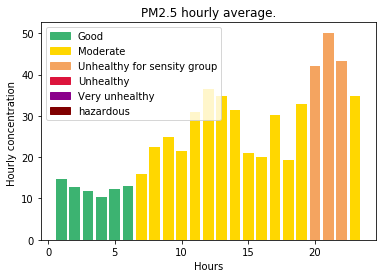

In [92]:
plt.bar(good["Hourly"].values, good['PM25'], color='MediumSeaGreen')
plt.bar(moderate["Hourly"].values, moderate['PM25'], color='gold')
plt.bar(unhealthy_for_sensitive_group["Hourly"].values, unhealthy_for_sensitive_group['PM25'], color='SandyBrown')
plt.bar(unhealthy["Hourly"].values, unhealthy['PM25'], color='Crimson')
plt.bar(very_unhealthy["Hourly"].values, very_unhealthy['PM25'], color='DarkMagenta')
plt.bar(hazardous["Hourly"].values, hazardous["PM25"],color = "Maroon")


plt.title("PM2.5 hourly average.")
colors = {'Good':'MediumSeaGreen', 'Moderate':'gold', "Unhealthy for sensity group":"SandyBrown", "Unhealthy": "Crimson","Very unhealthy":"DarkMagenta", "hazardous":"Maroon"}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.xlabel("Hours")
plt.ylabel("Hourly concentration ")



In [451]:
#plt.bar(t1["Hourly"].values, t1['CO'], color='g')
#plt.bar(t2["Hourly"].values, t2['CO'], color='gold')
#plt.bar(t3["Hourly"].values, t3['CO'], color='darkorange')
#plt.bar(t4["Hourly"].values, t4['CO'], color='black')

In [335]:
t = "24:00:00"
(h, m, s) = t.split(':')
result = int(h) * 3600 + int(m) * 60 + int(s)

In [ ]:
####Weekly analysis

In [50]:
Data.rename(columns = {"FECHA": "Day","HORA;PCD9/SO2": "Time_SO2","Flag;PCD9/H2S": "Time_H2S", "Flag;PCD9/NO": "Time_NO",
                     "Flag;PCD9/NO2":"Time_NO2","Flag;PCD9/NOx": "Time_NOx", "Flag;PCD9/CO": "Time_CO","Flag;PCD9/O3": "Time_O3", "Flag;PCD9/PM2.5": "Time_PM25"},inplace = True)

In [51]:
Data

,Day,Time_SO2,Time/H2S,Time/NO,Time/NO2,Time_NOx,Time_CO,Time_O3,Time_PM25,Flag;,Time,SO2,flag,PM25,O3,CO
0,01-01-2020,00:05;3.82,T;14.86,T;-8,N;-33.5,N;-41.5,N;6.48,T;150.96,T;93.22,T,00:05,3.82,N,93.22,150.96,6.48
1,01-01-2020,00:10;3.84,Z;14.47,Z;-8,N;-33.5,N;-41.5,N;6.26,Z;153.43,T;99.11,T,00:10,3.84,N,99.11,153.43,6.26
2,01-01-2020,00:15;3.12,C;13.89,M;-8,N;-33.5,N;-41.5,N;5.28,C;153.74,T;102.34,T,00:15,3.12,N,102.34,153.74,5.28
3,01-01-2020,00:20;3.14,C;41.13,M;-8,N;-33.5,N;-41.5,N;5.64,C;149.44,T;98.62,T,00:20,3.14,N,98.62,149.44,5.64
4,01-01-2020,00:25;4.05,M;141.28,M;-8,M;-33.5,M;-41.5,M;6.06,M;151.65,T;99.31,T,00:25,4.05,M,99.31,151.65,6.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64795,12-08-2020,23:40;8.79,D;3.4,N;-0.55,T;22.6,T;22.05,T;9.85,T;222.21,T;116.76,T,23:40,8.79,T,116.76,222.21,9.85
64796,12-08-2020,23:45;9.31,D;2.87,N;-0.87,T;23.47,T;22.59,T;10,T;225.89,T;121.84,T,23:45,9.31,T,121.84,225.89,10
64797,12-08-2020,23:50;8.99,D;4.55,N;-0.23,T;25.35,T;25.13,T;10.09,T;231.84,T;128.66,T,23:50,8.99,T,128.66,231.84,10.09
64798,12-08-2020,23:55;8.89,D;3.83,N;-0.73,T;24.39,T;23.66,T;10.15,T;226.93,T;124.79,T,23:55,8.89,T,124.79,226.93,10.15


In [93]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64800 entries, 0 to 64799
Data columns (total 10 columns):
Day          64800 non-null object
Time_SO2     64800 non-null object
Time_H2S     64800 non-null object
Time_NO      64800 non-null object
Time_NO2     64800 non-null object
Time_NOx     64800 non-null object
Time_CO      64800 non-null object
Time_O3      64800 non-null object
Time_PM25    64800 non-null object
Flag;        64800 non-null object
dtypes: object(10)
memory usage: 4.9+ MB


In [94]:
Data[["Time","SO2"]] = Data.Time_SO2.str.split(";",expand=True) 
Data[["flag","PM25"]] = Data.Time_PM25.str.split(";",expand=True)
Data[["flag","O3"]] = Data.Time_O3.str.split(";",expand=True)
Data[["flag","CO"]] = Data.Time_CO.str.split(";",expand=True)
Data[["flag","NO2"]] = Data.Time_NO2.str.split(";",expand=True)


In [95]:
Data

,Day,Time_SO2,Time_H2S,Time_NO,Time_NO2,Time_NOx,Time_CO,Time_O3,Time_PM25,Flag;,Time,SO2,flag,PM25,O3,CO,NO2
0,01-01-2020,00:05;3.82,T;14.86,T;-8,N;-33.5,N;-41.5,N;6.48,T;150.96,T;93.22,T,00:05,3.82,N,93.22,150.96,6.48,-33.5
1,01-01-2020,00:10;3.84,Z;14.47,Z;-8,N;-33.5,N;-41.5,N;6.26,Z;153.43,T;99.11,T,00:10,3.84,N,99.11,153.43,6.26,-33.5
2,01-01-2020,00:15;3.12,C;13.89,M;-8,N;-33.5,N;-41.5,N;5.28,C;153.74,T;102.34,T,00:15,3.12,N,102.34,153.74,5.28,-33.5
3,01-01-2020,00:20;3.14,C;41.13,M;-8,N;-33.5,N;-41.5,N;5.64,C;149.44,T;98.62,T,00:20,3.14,N,98.62,149.44,5.64,-33.5
4,01-01-2020,00:25;4.05,M;141.28,M;-8,M;-33.5,M;-41.5,M;6.06,M;151.65,T;99.31,T,00:25,4.05,M,99.31,151.65,6.06,-33.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64795,12-08-2020,23:40;8.79,D;3.4,N;-0.55,T;22.6,T;22.05,T;9.85,T;222.21,T;116.76,T,23:40,8.79,T,116.76,222.21,9.85,22.6
64796,12-08-2020,23:45;9.31,D;2.87,N;-0.87,T;23.47,T;22.59,T;10,T;225.89,T;121.84,T,23:45,9.31,T,121.84,225.89,10,23.47
64797,12-08-2020,23:50;8.99,D;4.55,N;-0.23,T;25.35,T;25.13,T;10.09,T;231.84,T;128.66,T,23:50,8.99,T,128.66,231.84,10.09,25.35
64798,12-08-2020,23:55;8.89,D;3.83,N;-0.73,T;24.39,T;23.66,T;10.15,T;226.93,T;124.79,T,23:55,8.89,T,124.79,226.93,10.15,24.39


In [133]:
Data['Day'] = pd.to_datetime(Data['Day'])

In [134]:
Data

,Day,Time_SO2,Time_H2S,Time_NO,Time_NO2,Time_NOx,Time_CO,Time_O3,Time_PM25,Flag;,Time,SO2,flag,PM25,O3,CO,NO2
0,2020-01-01,00:05;3.82,T;14.86,T;-8,N;-33.5,N;-41.5,N;6.48,T;150.96,T;93.22,T,00:05,3.82,N,93.22,150.96,6.48,0.00
1,2020-01-01,00:10;3.84,Z;14.47,Z;-8,N;-33.5,N;-41.5,N;6.26,Z;153.43,T;99.11,T,00:10,3.84,N,99.11,153.43,6.26,0.00
2,2020-01-01,00:15;3.12,C;13.89,M;-8,N;-33.5,N;-41.5,N;5.28,C;153.74,T;102.34,T,00:15,3.12,N,102.34,153.74,5.28,0.00
3,2020-01-01,00:20;3.14,C;41.13,M;-8,N;-33.5,N;-41.5,N;5.64,C;149.44,T;98.62,T,00:20,3.14,N,98.62,149.44,5.64,0.00
4,2020-01-01,00:25;4.05,M;141.28,M;-8,M;-33.5,M;-41.5,M;6.06,M;151.65,T;99.31,T,00:25,4.05,M,99.31,151.65,6.06,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64795,2020-12-08,23:40;8.79,D;3.4,N;-0.55,T;22.6,T;22.05,T;9.85,T;222.21,T;116.76,T,23:40,8.79,T,116.76,222.21,9.85,22.60
64796,2020-12-08,23:45;9.31,D;2.87,N;-0.87,T;23.47,T;22.59,T;10,T;225.89,T;121.84,T,23:45,9.31,T,121.84,225.89,10.00,23.47
64797,2020-12-08,23:50;8.99,D;4.55,N;-0.23,T;25.35,T;25.13,T;10.09,T;231.84,T;128.66,T,23:50,8.99,T,128.66,231.84,10.09,25.35
64798,2020-12-08,23:55;8.89,D;3.83,N;-0.73,T;24.39,T;23.66,T;10.15,T;226.93,T;124.79,T,23:55,8.89,T,124.79,226.93,10.15,24.39


In [135]:
Data['PM25'] = Data['PM25'].astype(float)
Data["CO"] =  Data["CO"].astype(float)
Data["O3"] = Data["O3"].astype(float)
Data["NO2"] = Data["NO2"].astype(float)
Data["SO2"] = Data["SO2"].astype(float)

In [136]:
num = Data._get_numeric_data()

In [137]:
num[num < 0] = 0

In [138]:
Data

,Day,Time_SO2,Time_H2S,Time_NO,Time_NO2,Time_NOx,Time_CO,Time_O3,Time_PM25,Flag;,Time,SO2,flag,PM25,O3,CO,NO2
0,2020-01-01,00:05;3.82,T;14.86,T;-8,N;-33.5,N;-41.5,N;6.48,T;150.96,T;93.22,T,00:05,3.82,N,93.22,150.96,6.48,0.00
1,2020-01-01,00:10;3.84,Z;14.47,Z;-8,N;-33.5,N;-41.5,N;6.26,Z;153.43,T;99.11,T,00:10,3.84,N,99.11,153.43,6.26,0.00
2,2020-01-01,00:15;3.12,C;13.89,M;-8,N;-33.5,N;-41.5,N;5.28,C;153.74,T;102.34,T,00:15,3.12,N,102.34,153.74,5.28,0.00
3,2020-01-01,00:20;3.14,C;41.13,M;-8,N;-33.5,N;-41.5,N;5.64,C;149.44,T;98.62,T,00:20,3.14,N,98.62,149.44,5.64,0.00
4,2020-01-01,00:25;4.05,M;141.28,M;-8,M;-33.5,M;-41.5,M;6.06,M;151.65,T;99.31,T,00:25,4.05,M,99.31,151.65,6.06,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64795,2020-12-08,23:40;8.79,D;3.4,N;-0.55,T;22.6,T;22.05,T;9.85,T;222.21,T;116.76,T,23:40,8.79,T,116.76,222.21,9.85,22.60
64796,2020-12-08,23:45;9.31,D;2.87,N;-0.87,T;23.47,T;22.59,T;10,T;225.89,T;121.84,T,23:45,9.31,T,121.84,225.89,10.00,23.47
64797,2020-12-08,23:50;8.99,D;4.55,N;-0.23,T;25.35,T;25.13,T;10.09,T;231.84,T;128.66,T,23:50,8.99,T,128.66,231.84,10.09,25.35
64798,2020-12-08,23:55;8.89,D;3.83,N;-0.73,T;24.39,T;23.66,T;10.15,T;226.93,T;124.79,T,23:55,8.89,T,124.79,226.93,10.15,24.39


In [142]:
start_date = '2020-08-01'
end_date = '2020-08-12'

In [143]:
mask = (Data['Day'] >= start_date) & (Data['Day'] <= end_date)

In [144]:
Data7 = Data.loc[mask]
Data7

,Day,Time_SO2,Time_H2S,Time_NO,Time_NO2,Time_NOx,Time_CO,Time_O3,Time_PM25,Flag;,Time,SO2,flag,PM25,O3,CO,NO2
2016,2020-08-01,00:05;0.98,T;173.6,T;-8,N;-33.5,N;-41.5,N;1.83,T;61.37,T;43.8,T,00:05,0.98,N,43.80,61.37,1.83,0.00
2017,2020-08-01,00:10;0.55,Z;418.34,Z;-8,N;-33.5,N;-41.5,N;2.15,Z;63.14,T;44.74,T,00:10,0.55,N,44.74,63.14,2.15,0.00
2018,2020-08-01,00:15;0.81,C;722.13,M;-8,N;-33.5,N;-41.5,N;2.74,C;64.18,T;44.43,T,00:15,0.81,N,44.43,64.18,2.74,0.00
2019,2020-08-01,00:20;1.02,C;729.92,M;-8,N;-33.5,N;-41.5,N;2.66,C;65.36,T;44.39,T,00:20,1.02,N,44.39,65.36,2.66,0.00
2020,2020-08-01,00:25;1.17,M;303.71,M;-8,M;-33.5,M;-41.5,M;2.71,M;65.05,T;44.49,T,00:25,1.17,M,44.49,65.05,2.71,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63643,2020-08-08,23:40;4.52,D;5.7,N;3.75,T;40.47,T;44.22,T;12.36,T;242.47,T;103.81,T,23:40,4.52,T,103.81,242.47,12.36,40.47
63644,2020-08-08,23:45;4.68,D;6.08,N;1.51,T;39.51,T;41.02,T;12.04,T;241.22,T;101.94,T,23:45,4.68,T,101.94,241.22,12.04,39.51
63645,2020-08-08,23:50;4.62,D;4.34,N;1.31,T;37.88,T;39.19,T;11.93,T;241.69,T;101.13,T,23:50,4.62,T,101.13,241.69,11.93,37.88
63646,2020-08-08,23:55;4.54,D;5.11,N;1.77,T;36.15,T;37.92,T;11.77,T;236.59,T;100.12,T,23:55,4.54,T,100.12,236.59,11.77,36.15


In [303]:
Data8 =Data7[["Day",'O3',"CO","NO2","PM25"]]


In [304]:
Data8

,Day,O3,CO,NO2,PM25
2016,2020-08-01,61.37,1.83,0.00,43.80
2017,2020-08-01,63.14,2.15,0.00,44.74
2018,2020-08-01,64.18,2.74,0.00,44.43
2019,2020-08-01,65.36,2.66,0.00,44.39
2020,2020-08-01,65.05,2.71,0.00,44.49
...,...,...,...,...,...
63643,2020-08-08,242.47,12.36,40.47,103.81
63644,2020-08-08,241.22,12.04,39.51,101.94
63645,2020-08-08,241.69,11.93,37.88,101.13
63646,2020-08-08,236.59,11.77,36.15,100.12


/Users/brightabohsilasedem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [241]:
#Aug1= Data[(data['Day'] >= '2020-08-01') & (data['Day'] <= '2020-08-01')]

In [109]:
Data8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62784 entries, 288 to 64799
Data columns (total 5 columns):
Day     62784 non-null datetime64[ns]
O3      62784 non-null float64
CO      62784 non-null float64
NO2     62784 non-null float64
PM25    62784 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.9 MB


In [129]:
Data7['PM25'] = Data7['PM25'].astype(float)
Data7["CO"] =  Data7["CO"].astype(float)
#Data["Day"] = Data["Day"].astype(float)

/Users/brightabohsilasedem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/brightabohsilasedem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [130]:
Data7

,Day,Time_SO2,Time/H2S,Time/NO,Time/NO2,Time_NOx,Time_CO,Time_O3,Time_PM25,Flag;,Time,SO2,flag,PM25,O3,CO,NOx
2016,2020-08-01,00:05;0.98,T;173.6,T;-8,N;-33.5,N;-41.5,N;1.83,T;61.37,T;43.8,T,00:05,0.98,N,43.80,61.37,1.83,-41.5
2017,2020-08-01,00:10;0.55,Z;418.34,Z;-8,N;-33.5,N;-41.5,N;2.15,Z;63.14,T;44.74,T,00:10,0.55,N,44.74,63.14,2.15,-41.5
2018,2020-08-01,00:15;0.81,C;722.13,M;-8,N;-33.5,N;-41.5,N;2.74,C;64.18,T;44.43,T,00:15,0.81,N,44.43,64.18,2.74,-41.5
2019,2020-08-01,00:20;1.02,C;729.92,M;-8,N;-33.5,N;-41.5,N;2.66,C;65.36,T;44.39,T,00:20,1.02,N,44.39,65.36,2.66,-41.5
2020,2020-08-01,00:25;1.17,M;303.71,M;-8,M;-33.5,M;-41.5,M;2.71,M;65.05,T;44.49,T,00:25,1.17,M,44.49,65.05,2.71,-41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63643,2020-08-08,23:40;4.52,D;5.7,N;3.75,T;40.47,T;44.22,T;12.36,T;242.47,T;103.81,T,23:40,4.52,T,103.81,242.47,12.36,44.22
63644,2020-08-08,23:45;4.68,D;6.08,N;1.51,T;39.51,T;41.02,T;12.04,T;241.22,T;101.94,T,23:45,4.68,T,101.94,241.22,12.04,41.02
63645,2020-08-08,23:50;4.62,D;4.34,N;1.31,T;37.88,T;39.19,T;11.93,T;241.69,T;101.13,T,23:50,4.62,T,101.13,241.69,11.93,39.19
63646,2020-08-08,23:55;4.54,D;5.11,N;1.77,T;36.15,T;37.92,T;11.77,T;236.59,T;100.12,T,23:55,4.54,T,100.12,236.59,11.77,37.92


In [147]:
N = 288
#PM2.5 & PM10
days=Data8["PM25"].groupby(Data8["PM25"].index // N).mean()

In [148]:
z= days

In [149]:
z = days.to_frame()

In [150]:
z

,PM25
7,36.368125
38,35.583438
67,42.355035
98,32.375694
128,24.116076
159,40.930104
189,69.776319
220,74.637778


In [151]:
z["Days"] = "Aug01","Aug02","Aug03","Aug04","Aug05","Aug06","Aug07","Aug08"

In [152]:
Df= z

In [153]:
Df

,PM25,Days
7,36.368125,Aug01
38,35.583438,Aug02
67,42.355035,Aug03
98,32.375694,Aug04
128,24.116076,Aug05
159,40.930104,Aug06
189,69.776319,Aug07
220,74.637778,Aug08


In [154]:
good = Df[Df["PM25"] <= 15.4] 

moderate = Df[(Df['PM25'] > 15.5) & (Df['PM25'] < 40.4) ]

unhealthy_for_sensitive_group = Df[(Df["PM25"]>=40.5) & (Df["PM25"] < 65.4) ]

unhealthy = Df[(Df["PM25"] >=65.5) & (Df["PM25"]  < 150.4) ]

very_unhealthy = Df[(Df["PM25"] >= 150.5) & (Df["PM25"]  < 250)]
hazardous = Df[(Df["PM25"] >= 250.5) & (Df["PM25"]  <= 500.4)]

Text(0, 0.5, 'PM2.5 Concentration ')

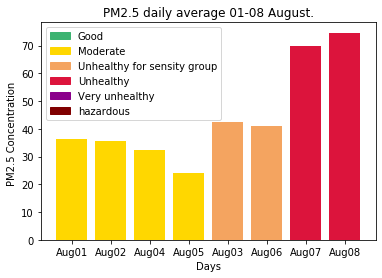

In [155]:
plt.bar(good["Days"].values, good['PM25'], color='MediumSeaGreen')
plt.bar(moderate["Days"].values, moderate['PM25'], color='gold')
plt.bar(unhealthy_for_sensitive_group["Days"].values, unhealthy_for_sensitive_group['PM25'], color='SandyBrown')
plt.bar(unhealthy["Days"].values, unhealthy['PM25'], color='Crimson')
plt.bar(very_unhealthy["Days"].values, very_unhealthy['PM25'], color='DarkMagenta')
plt.bar(hazardous["Days"].values, hazardous["PM25"],color = "Maroon")


plt.title("PM2.5 daily average 01-08 August.")
colors = {'Good':'MediumSeaGreen', 'Moderate':'gold', "Unhealthy for sensity group":"SandyBrown", "Unhealthy": "Crimson","Very unhealthy":"DarkMagenta", "hazardous":"Maroon"}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.xlabel("Days")
plt.ylabel("PM2.5 Concentration ")


In [176]:
#CO and Ozone 8-hour average 
N = 96

days=Data8["CO"].groupby(Data8["CO"].index // N).mean()


In [177]:
 C =days.to_frame()

In [178]:
C

,CO
21,1.664271
22,1.378229
23,3.052812
114,2.625625
115,2.059271
116,3.933854
201,3.396250
202,3.207604
203,4.218021
294,3.813021


In [214]:
C["Dayz"] = "08_Aug01","16_Aug01","24_Aug01","08_Aug02","16_Aug02", "24_Aug02","08_Aug03","16_Aug03","24_Aug03","08_Aug04","16_Aug04","24_Aug04","08_Aug05","16_Aug05","24_Aug05","08_Aug06","16_Aug06","24_Aug06","08_Aug07","16_Aug07","24_Aug07","08_Aug08","16_Aug08","24_Aug08"

In [184]:
#CO["Time_Days"] = "08hrs_Aug01","16hrs_Aug01","24hrs_Aug01","08hrs_Aug02","16hrs_Aug02","24hrs_Aug02","08hrs_Aug03","16hrs_Aug03","24hrs_Aug03","08hrs_Aug04","16hrs_Aug04","24hrs_Aug04","08hrs_Aug05","16hrs_Aug05","24hrs_Aug05","08hrs_Aug06","16hrs_Aug06","24hrs_Aug06","08hrs_Aug07","16hrs_Aug07","24hrs_Aug07","08hrs_Aug08","16hrs_Aug08","24hrs_Aug08"

In [215]:
C

,CO,Time_Days,Days,Dayz
21,1.664271,08hrs_Aug01,08hrs_Aug01,08_Aug01
22,1.378229,16hrs_Aug01,16hrs_Aug01,16_Aug01
23,3.052812,24hrs_Aug01,24hrs_Aug01,24_Aug01
114,2.625625,08hrs_Aug02,08hrs_Aug02,08_Aug02
115,2.059271,16hrs_Aug02,16hrs_Aug02,16_Aug02
116,3.933854,24hrs_Aug02,24hrs_Aug02,24_Aug02
201,3.396250,08hrs_Aug03,08hrs_Aug03,08_Aug03
202,3.207604,16hrs_Aug03,16hrs_Aug03,16_Aug03
203,4.218021,24hrs_Aug03,24hrs_Aug03,24_Aug03
294,3.813021,08hrs_Aug04,08hrs_Aug04,08_Aug04


In [216]:
good = C[C["CO"] <= 4.4] 

moderate = C[(C['CO'] > 4.5) & (C['CO'] < 9.4) ]

unhealthy_for_sensitive_group = C[(C['CO']>=9.5) & (C['CO'] < 12.4) ]

unhealthy = C[(C['CO'] >=12.5) & (C['CO']  < 15.4) ]

very_unhealthy = C[(C['CO'] >= 15.5) & (C['CO']  < 30.4)]
hazardous = C[(C['CO'] >= 30.5) & (C['CO']  <= 50.4)]

Text(0, 0.5, 'CO Concentration')

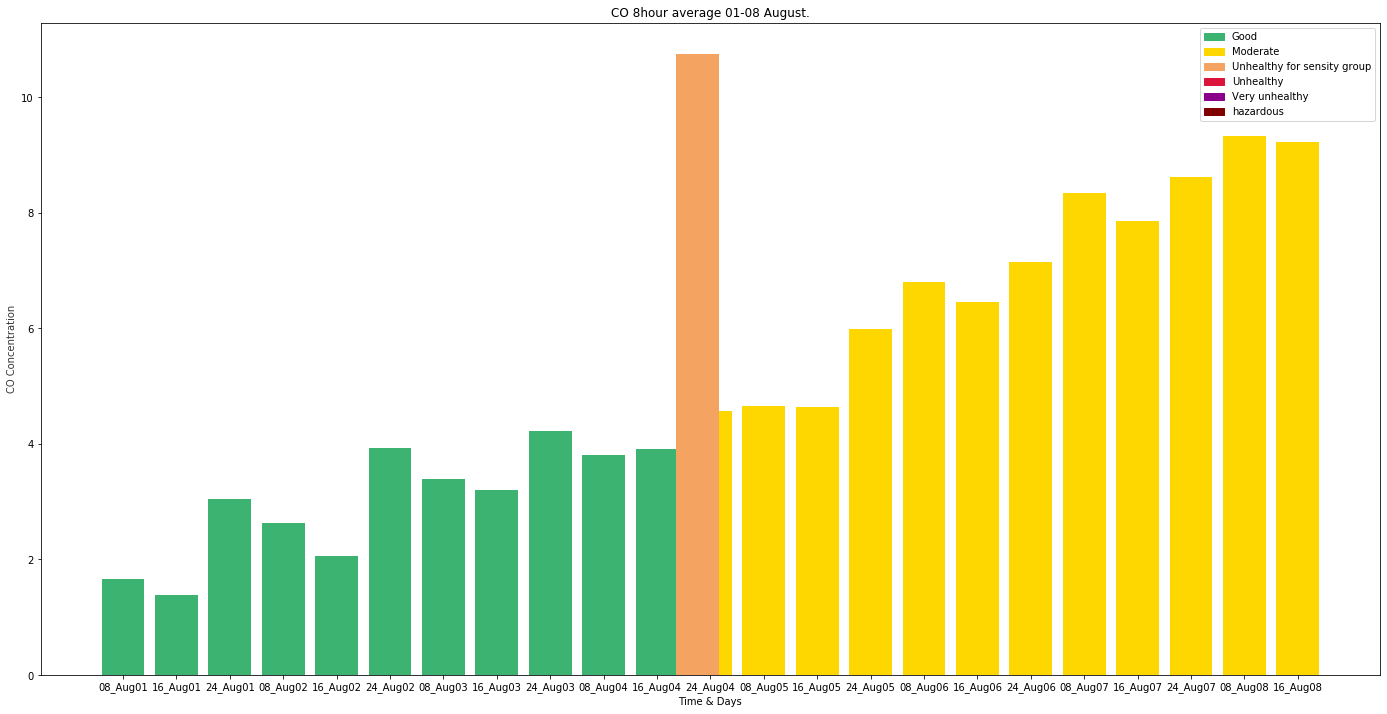

In [233]:
plt.figure(figsize = (24,12))
plt.bar(good["Dayz"].values, good['CO'], color='MediumSeaGreen')
plt.bar(moderate["Dayz"].values, moderate['CO'], color='gold')
plt.bar(unhealthy_for_sensitive_group['CO'].values, unhealthy_for_sensitive_group['CO'], color='SandyBrown')
plt.bar(unhealthy["Dayz"].values, unhealthy['CO'], color='Crimson')
plt.bar(very_unhealthy["Dayz"].values, very_unhealthy['CO'], color='DarkMagenta')
plt.bar(hazardous["Dayz"].values, hazardous["CO"],color = "Maroon")


plt.title("CO 8hour average 01-08 August.")
colors = {'Good':'MediumSeaGreen', 'Moderate':'gold', "Unhealthy for sensity group":"SandyBrown", "Unhealthy": "Crimson","Very unhealthy":"DarkMagenta", "hazardous":"Maroon"}         
labels = list(colors.keys())
handles = [plt.Rectangle((1,1),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.xlabel("Time & Days")
plt.ylabel("CO Concentration")


In [285]:
#data = Data8.drop(Data8[Data8.NO2 == 0].index, inplace=True)

In [318]:
# 1 hr average -NO2 and SO2
Data9= Data8[(Data8['Day'] == '2020-08-06')]

In [320]:
# 1 hr average -NO2 and SO2
N = 12

days=Data9["NO2"].groupby(Data9["NO2"].index // N).mean()


In [325]:
No2da =days.to_frame()

In [327]:
No2da["Hourly"]= 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24

In [263]:
#NO.drop(NO[NO.NO2 < 0].index, inplace=True)

In [329]:
NO=No2da

In [332]:
good = NO[NO["NO2"] <= 53] 

moderate = NO[(NO['NO2'] > 54) & (NO['NO2'] < 100) ]

unhealthy_for_sensitive_group = NO[(NO['NO2']>=101) & (NO['NO2'] < 360) ]

unhealthy = NO[(NO['NO2'] >=361) & (NO['NO2']  < 649) ]

very_unhealthy = NO[(NO['NO2'] >= 650) & (NO['NO2']  < 1249)]
hazardous = NO[(NO['NO2'] >= 1250) & (NO['NO2']  <= 2049)]

Text(0, 0.5, 'NO2 Concentration')

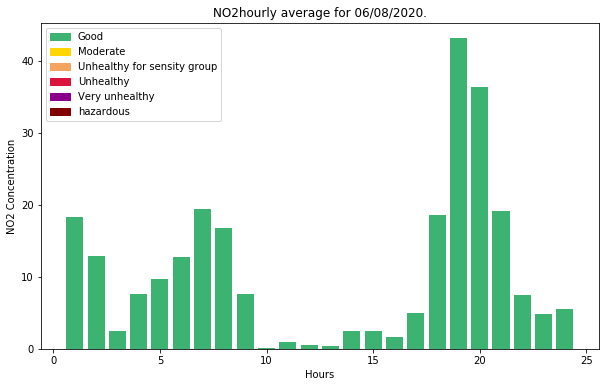

In [336]:
plt.figure(figsize = (10,6))
plt.bar(good["Hourly"].values, good['NO2'], color='MediumSeaGreen')
plt.bar(moderate["Hourly"].values, moderate['NO2'], color='gold')
plt.bar(unhealthy_for_sensitive_group['NO2'].values, unhealthy_for_sensitive_group['NO2'], color='SandyBrown')
plt.bar(unhealthy["Hourly"].values, unhealthy['NO2'], color='Crimson')
plt.bar(very_unhealthy["Hourly"].values, very_unhealthy['NO2'], color='DarkMagenta')
plt.bar(hazardous["Hourly"].values, hazardous["NO2"],color = "Maroon")


plt.title("NO2hourly average for 06/08/2020.")
colors = {'Good':'MediumSeaGreen', 'Moderate':'gold', "Unhealthy for sensity group":"SandyBrown", "Unhealthy": "Crimson","Very unhealthy":"DarkMagenta", "hazardous":"Maroon"}         
labels = list(colors.keys())
handles = [plt.Rectangle((1,1),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.xlabel("Hours")
plt.ylabel("NO2 Concentration")

In [ ]:
#8 hr Ozone average
ozone = 